## Loading of Stringer orientations data

includes some visualizations

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [5]:
from umap import UMAP

C:\Users\Leo\miniconda3\envs\nma-compneuro\lib\site-packages\umap\umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [6]:
# @title Figure settings
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [7]:
# @title Data loading

dat = np.load('../../data/stringer_orientations.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* `dat['sresp']`: neurons by stimuli, a.k.a. the neural response data (23589 by 4598)
* `dat['xyz']`: three-dimensional position of each neuron in the brain.
* `dat['run']`: 1 by stimuli, a.k.a. the running speed of the animal in a.u.
* `dat['istim']`: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* `dat['u_spont']`: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* `dat['v_spont']`: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* `dat['u_spont'] @ dat['v_spont']`: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.


In [15]:
# (xyz coordinates, neuron)
dat['xyz'].shape

(3, 23589)

In [ ]:
for k,v in dat.items():

In [16]:
# (neuron, 
dat['sresp'].shape

(23589, 4598)

(array([4.428e+03, 1.070e+02, 3.000e+01, 1.700e+01, 9.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  0.        ,  37.40289612,  74.80579224, 112.20868835,
        149.61158447, 187.01448059, 224.41737671, 261.82027283,
        299.22316895, 336.62606506, 374.02896118]),
 <BarContainer object of 10 artists>)

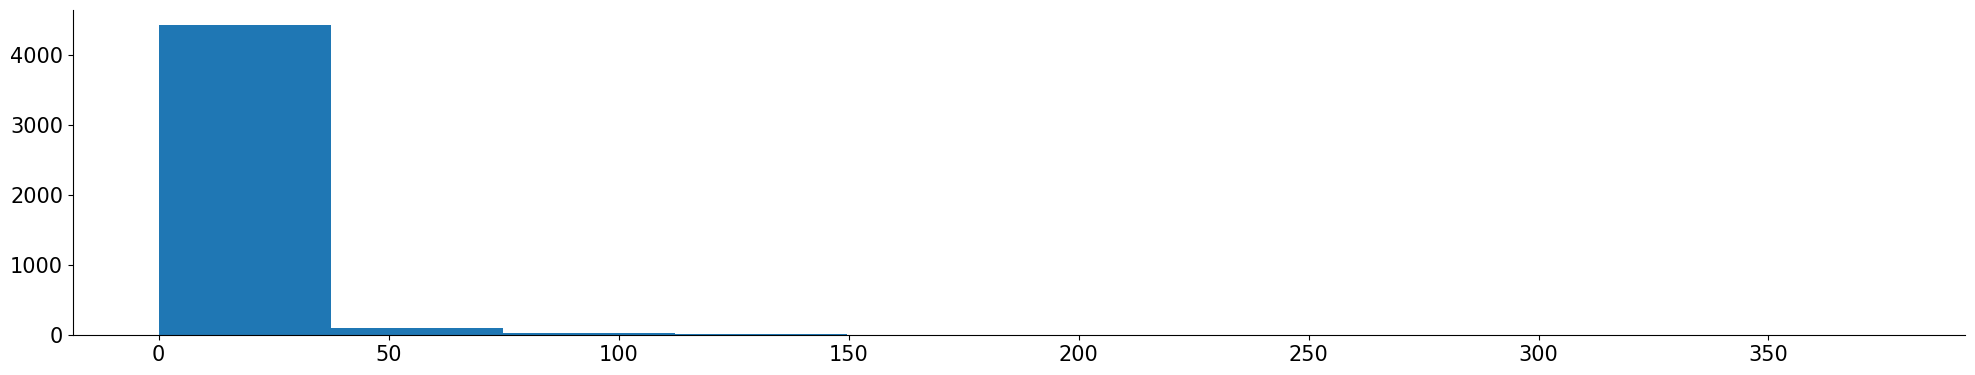

In [18]:
plt.hist(dat['sresp'][0])

In [8]:
print(dat['sresp'].shape)
print(len(dat['stat']))

(23589, 4598)
23589


In [19]:
print(dat['run'].shape)


(4598,)


In [23]:
print(dat['istim'].shape)


(4598,)


(array([456., 464., 491., 449., 436., 475., 467., 451., 467., 442.]),
 array([6.09159136e-04, 6.28788729e-01, 1.25696830e+00, 1.88514787e+00,
        2.51332744e+00, 3.14150701e+00, 3.76968658e+00, 4.39786615e+00,
        5.02604572e+00, 5.65422529e+00, 6.28240486e+00]),
 <BarContainer object of 10 artists>)

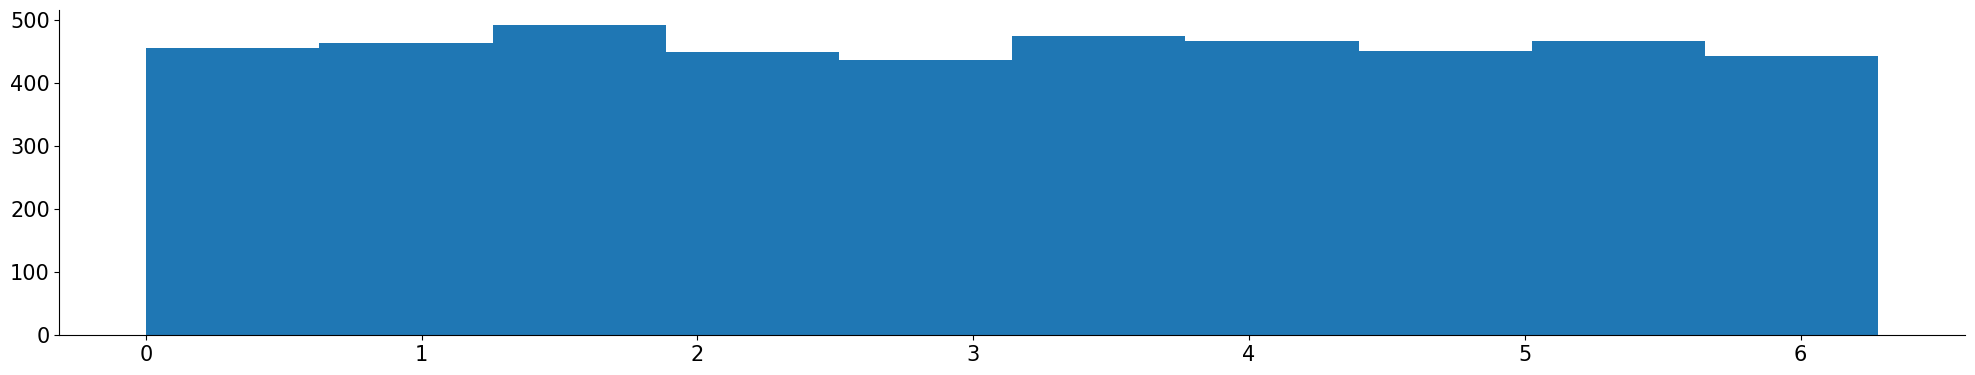

In [25]:
plt.hist(dat['istim'])


(array([3011.,  375.,  202.,  178.,  194.,  247.,  236.,  106.,   42.,
           7.]),
 array([ 0.        ,  8.06159687, 16.12319374, 24.18478966, 32.24638748,
        40.3079834 , 48.36957932, 56.43117523, 64.49277496, 72.55436707,
        80.6159668 ]),
 <BarContainer object of 10 artists>)

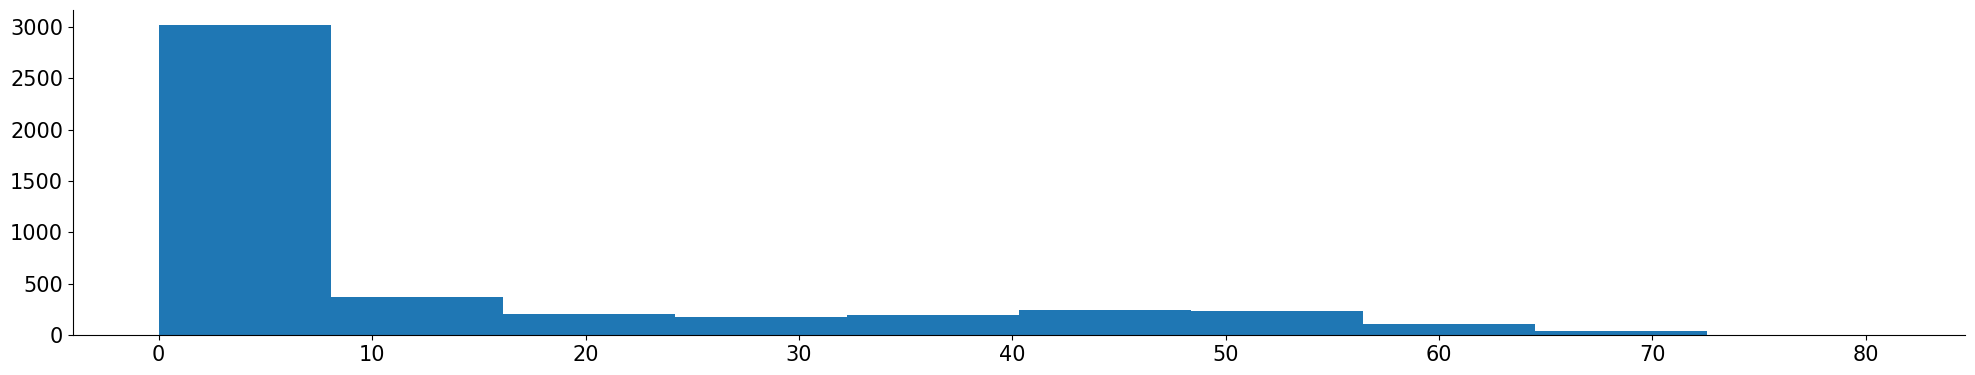

In [20]:
plt.hist(dat['run'])


In [12]:
for k, v in dat.items():
    try:
        print(k, v.shape)
    except:
        print(k, v)


sresp (23589, 4598)
istim (4598,)
stat (23589,)
u_spont (23589, 128)
v_spont (128, 910)
mean_spont (23589,)
std_spont (23589,)
stimtimes (4598,)
frametimes (25839,)
camtimes (450538,)
run (4598,)
info responses of 23589 neurons to 4598 static gratings
xyz (3, 23589)


In [13]:
dat["frametimes"]

array([    8119,     9862,    11604, ..., 45053181, 45054925, 45056668],
      dtype=int64)

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

In [ ]:
# @title Basic data properties using plot, hist and scatter
ax = plt.subplot(1, 5, 1)
plt.hist(dat['istim'])
ax.set(xlabel='orientations', ylabel='# trials')

ax = plt.subplot(1, 5, 2)
plt.scatter(dat['istim'], dat['sresp'][1000], s=1)
ax.set(xlabel='orientation', ylabel='neural response')

ax = plt.subplot(1, 5, 3)
plt.plot(dat['run'][:1000])
ax.set(xlabel='timepoints', ylabel='running')

ax = plt.subplot(1, 5, 4)
plt.scatter(dat['run'], dat['sresp'][20998], s=1)
ax.set(xlabel='running', ylabel='neural response')

plt.show()

In [ ]:
# @title take PCA after preparing data by z-score

Z = zscore(dat['sresp'], axis=1)
X = PCA(n_components=200).fit_transform(Z.T)

In [ ]:
# @title plot PCs as function of stimulus orientation
for j in range(5):
  ax = plt.subplot(1, 5, j + 1)
  plt.scatter(dat['istim'], X[:, j], s=1)
  ax.set(xlabel='orientation', ylabel='PC%d'%j)
plt.show()

In [ ]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions.

ncomp = 3  # try 2, then try 3
xinit = 3 * zscore(X[:, :ncomp], axis=0)
embed = UMAP(n_components=ncomp, init=xinit, n_neighbors=25,
             metric='correlation', transform_seed=42).fit_transform(X)

In [ ]:
plt.figure(figsize=(8,8))
for i in range(ncomp):
  for j in range(ncomp):
    plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    if i == j:
      plt.scatter(dat['istim'], embed[:, i], s=1)
    else:
      plt.scatter(embed[:, j], embed[:, i], s=1, c=dat['istim'], cmap='hsv')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(embed[:, 0], embed[:, 2], s=4, c=dat['istim'], cmap='hsv')
plt.title('colored by stimulus orientation')

plt.subplot(1, 2, 2)
plt.scatter(embed[:, 0], embed[:, 2], s=4, c=dat['run'], vmin=0, vmax=10)
plt.title('colored by running speed')
plt.show()